# Explore outputs from tag CO2 simulation

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 8

import warnings
warnings.filterwarnings('ignore')

In [11]:
# import modules
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr # the major tool to work with NetCDF data!
from util.gamap_colormap import WhGrYlRd

## Read in data

In [4]:
fname = '/home/msadiq/Desktop/co2/data/outputs/2018-02/satellite.20180201.nc'
ds = xr.open_dataset(fname)
ds # same as print(ds) in IPython/Jupyter environment

<xarray.Dataset>
Dimensions:               (lat: 91, lev: 47, lon: 144, time: 1)
Coordinates:
  * time                  (time) datetime64[ns] 2018-02-01
  * lev                   (lev) float64 0.9925 0.9775 ... 0.000127 2.763e-05
  * lon                   (lon) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * lat                   (lat) float64 -89.5 -88.0 -86.0 ... 86.0 88.0 89.5
Data variables:
    SpeciesConc_CO2oc     (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2bf     (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2ff     (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2       (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag1   (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag2   (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag3   (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag4   (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag5   (time, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag6   (time, lev, lat, lon) float32 ...


In [6]:
varnames = list(ds.data_vars.keys())  # Get a list of variable names. The expression is a bit cumbersome. Just copy and paste it for now.
nvar = len(varnames)  # how many elements in the list?

print(nvar, varnames)

27 ['SpeciesConc_CO2oc', 'SpeciesConc_CO2bf', 'SpeciesConc_CO2ff', 'SpeciesConc_CO2', 'SpeciesConc_CO2Tag1', 'SpeciesConc_CO2Tag2', 'SpeciesConc_CO2Tag3', 'SpeciesConc_CO2Tag4', 'SpeciesConc_CO2Tag5', 'SpeciesConc_CO2Tag6', 'SpeciesConc_CO2Tag7', 'SpeciesConc_CO2Tag8', 'SpeciesConc_CO2Tag9', 'SpeciesConc_CO2Tag10', 'SpeciesConc_CO2Tag11', 'SpeciesConc_CO2Tag12', 'SpeciesConc_CO2Tag13', 'SpeciesConc_CO2Tag14', 'SpeciesConc_CO2Tag15', 'SpeciesConc_CO2Tag16', 'SpeciesConc_CO2Tag17', 'SpeciesConc_CO2Tag18', 'SpeciesConc_CO2Tag19', 'SpeciesConc_CO2Tag20', 'SpeciesConc_CO2Tag21', 'SpeciesConc_CO2Tag22', 'PEDGE_S_PSURF']


# global plot

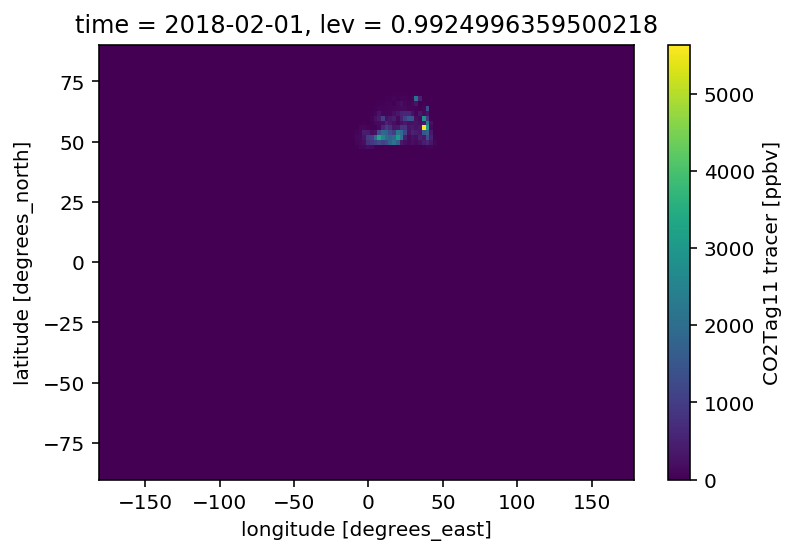

In [9]:
ds['SpeciesConc_CO2Tag11'].isel(time=0,lev=0).plot()

In [19]:
ds = ds*1e-6 # unit conversion: mol/mol to ppm

In [20]:
def plot_layer(variable, layer):
    fig = plt.figure(figsize=[8, 4])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
    ds[variable].isel(time=0, lev=layer).plot(ax=ax, cmap=WhGrYlRd)
    ax.set_title(variable+f'; lev={layer}')
    
    # recall that Python uses indentation to determine the end of a function or a "for" loop
    # there is no "end" expression

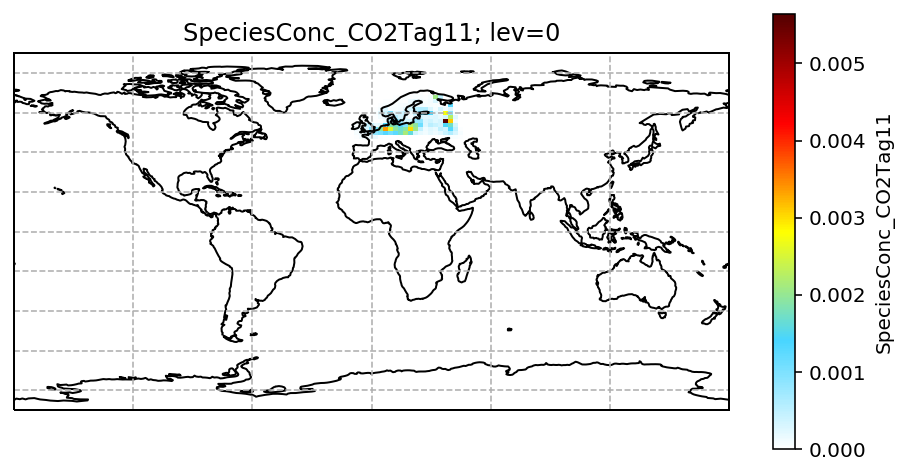

In [21]:
plot_layer(variable='SpeciesConc_CO2Tag11', layer=0)

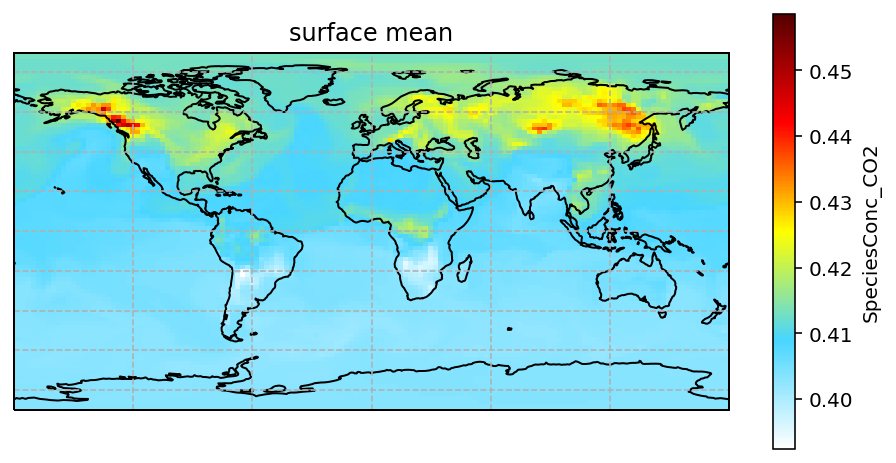

In [22]:
fig = plt.figure(figsize=[8, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')

ds['SpeciesConc_CO2'].isel(time=0,lev=0).plot(ax=ax, cmap=WhGrYlRd)
#dr_mean[0,0,:,:].plot(ax = ax, cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.8, 'label': 'ppm'})  # The ax keyword is particularly useful for subplots. Can be omitted here.
ax.set_title('surface mean');

## Interactive exploration

In [23]:
from ipywidgets import interact, IntSlider, SelectionSlider, Dropdown

In [26]:
varnames[4:26]

['SpeciesConc_CO2Tag1',
 'SpeciesConc_CO2Tag2',
 'SpeciesConc_CO2Tag3',
 'SpeciesConc_CO2Tag4',
 'SpeciesConc_CO2Tag5',
 'SpeciesConc_CO2Tag6',
 'SpeciesConc_CO2Tag7',
 'SpeciesConc_CO2Tag8',
 'SpeciesConc_CO2Tag9',
 'SpeciesConc_CO2Tag10',
 'SpeciesConc_CO2Tag11',
 'SpeciesConc_CO2Tag12',
 'SpeciesConc_CO2Tag13',
 'SpeciesConc_CO2Tag14',
 'SpeciesConc_CO2Tag15',
 'SpeciesConc_CO2Tag16',
 'SpeciesConc_CO2Tag17',
 'SpeciesConc_CO2Tag18',
 'SpeciesConc_CO2Tag19',
 'SpeciesConc_CO2Tag20',
 'SpeciesConc_CO2Tag21',
 'SpeciesConc_CO2Tag22']

In [27]:
interact(plot_layer, 
         variable=Dropdown(options=varnames[4:26]),
         layer=Dropdown(options= np.arange(46))
         #l=IntSlider(min=0, max=46, step=1, continuous_update=False),
        );

# Disable `continuous_update` so the figure is only updated after you release the mouse. This reduces computing burden.

interactive(children=(Dropdown(description='variable', options=('SpeciesConc_CO2Tag1', 'SpeciesConc_CO2Tag2', …

In [29]:
def plot_layer_EU(variable, layer):
    fig = plt.figure(figsize=[8, 4])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
    ds[variable].isel(time=0, lev=layer).plot(ax=ax, cmap=WhGrYlRd)
    ax.set_xlim(-11,36)
    ax.set_ylim(36,64)
    ax.set_title(variable+f'; lev={layer}')
    
    # recall that Python uses indentation to determine the end of a function or a "for" loop
    # there is no "end" expression

In [31]:
interact(plot_layer_EU, 
         variable=Dropdown(options=varnames[4:26]),
         layer=Dropdown(options= np.arange(46))
         #l=IntSlider(min=0, max=46, step=1, continuous_update=False),
        );

# Disable `continuous_update` so the figure is only updated after you release the mouse. This reduces computing burden.

interactive(children=(Dropdown(description='variable', options=('SpeciesConc_CO2Tag1', 'SpeciesConc_CO2Tag2', …

### NOT GOOD. Animation, not as useful as I thought

In [32]:
import imageio

In [33]:
def plot_layer_gif(variable, layer, vmax):
    
    fig = plt.figure(figsize=[8, 4])
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
    ds_mean[variable].isel(time=0, lev=layer).plot(ax=ax, cmap=WhGrYlRd, vmax=vmax)
    ax.set_title(variable+f'; lev={layer}')
    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

    # recall that Python uses indentation to determine the end of a function or a "for" loop
    # there is no "end" expression

### resolution too low, dont know how to fix

In [ ]:
#imageio.mimsave('../plots/test.gif', [plot_layer_gif('SpeciesConc_CO2Tag4', ilayer, 5) for ilayer in range(10)], fps=1)

In [ ]:
def plot_layer_save(variable, layer, vmax):
    
    fig = plt.figure(figsize=[8, 4])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
    ds_mean[variable].isel(time=0, lev=layer).plot(ax=ax, cmap=WhGrYlRd, vmax=vmax, cbar_kwargs={'shrink': 0.8, 'label': 'ppm'})
    ax.set_title(variable+f'; lev={layer}')
    
    fig.savefig('../plots/Tag4/'+variable+'_'+str(layer)+'.png', dpi=300)
    
    # recall that Python uses indentation to determine the end of a function or a "for" loop
    # there is no "end" expression